Recursive Linear Least Squares, ARX

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ex15_2_lib import ARX, generate_arx_data
from ex15_1_lib import RLLS, run_linear_least_squares_estimation

In [38]:
# A linear ARX model
# defines the model function f(x) = f([Y,U]) = f([yk-1, ..., yk-na, uk, ..., uk-nb+1])
f_arx = lambda x: x
pa = 5
pb = 2
p = pa + pb
params = np.random.rand(p)-0.5
Y0 = np.zeros(pa)
U0 = np.zeros(pb)
arx1 = ARX(Y0,U0,params,f_arx)

In [39]:
# A non-linear ARX model
# defines the f(x) = f([Y,U]) = f([yk-1, ..., yk-na, uk, ..., uk-nb-1])
# f_arx = lambda x: np.array([ x[0]*x[1], 1 + x[2]*np.sin(x[0])]) 
# pa = 2
# pb = 1
# p = 2
# params = np.random.rand(p)-0.5
# Y0 = np.zeros(pa)
# U0 = np.zeros(pb)
# arx1 = ARX(Y0,U0,params,f_arx)

Real parameters:
 [-0.19376861 -0.24316133  0.29607986  0.36327516 -0.3960359   0.07269507
  0.12053074]
Initial estimated parameters:
 [ 9.59608762 -4.01463935 -9.07457782 10.60348616 -8.20636693  0.07189957
  0.17295516]
Final Estimated parameters: [-0.27206972 -0.20248499  0.31106639  0.47536553 -0.34760056  0.06051033
  0.11008636]


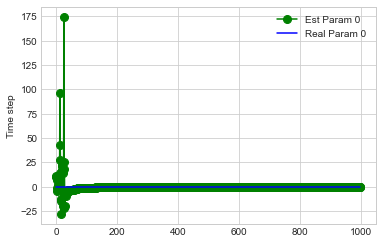

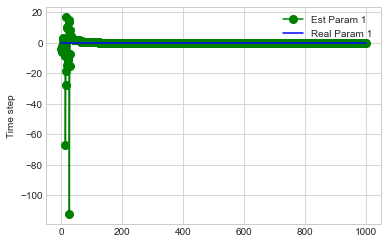

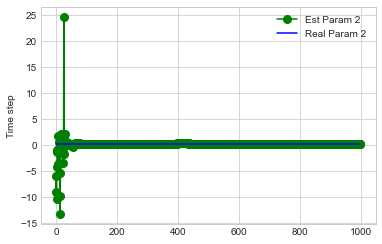

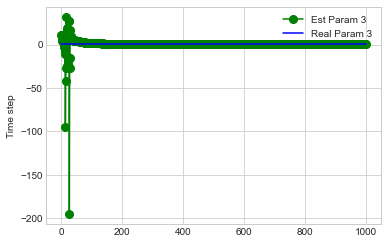

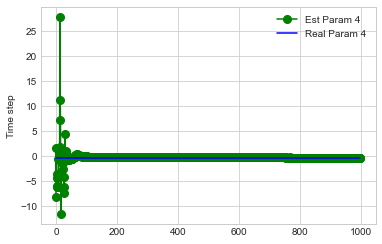

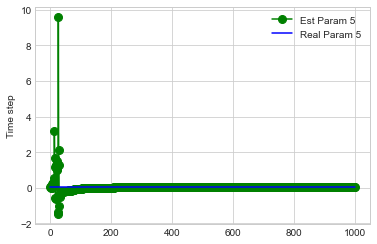

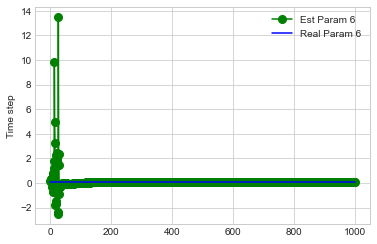

In [40]:
# Initialize the Recursive Linear Least Squares Filter 
# Run the ARX model and the RLLS together, step by step

N = 1000
sigma_output = 0.001

Y = Y0
U = U0

est_params = [  ]

# Initialize parameter estimates  

# Option 1

# Collect a few measurement and run a standard LS to init the recursive filter 
n = np.max([pa,pb]) + 1
data_in = np.random.rand(n)
data_out = generate_arx_data(arx1,data_in,sigma_output)
# LS Estimation Init
X = []
for i in range(n):
  U = np.roll(U,1); U[0] = data_in[i]
  X.append(np.concatenate([Y,U]))
  Y = np.roll(Y,1); Y[0] = data_out[i]
X = np.array(X)
# Estimation Run
est_params0, P0 = run_linear_least_squares_estimation(X, data_out, f_arx)
# Results

# Option 2
# est_params0 = np.ones(p)
# P0 = np.eye(p) 

print("Real parameters:\n", params)
print("Initial estimated parameters:\n", est_params0)

for i in range(N):
  u = np.random.rand()
  y = arx1.step(u) + sigma_output*np.random.normal(0,sigma_output) # generate a noisy output 
  
  # The current ARX input state is thus:
  U = np.roll(U,1); U[0] = u

  fx = f_arx(np.concatenate([Y,U]))

  if (i>0): 
    filter.update(fx, y)
  else:
    filter = RLLS(est_params0, np.eye(p)*0.1 + P0, 1.0)

  # Update the ARX output state to be ready for next iteration
  Y = np.roll(Y,1); Y[0] = y # includes noise, that is a problem of course, need Total Least Squares to do better. Or KF :)

  # Logging
  est_params.append(filter.params)
  # print(filter.params, np.diag(filter.P))

# Plotting Results 
est_params = np.array(est_params)
data_k = np.arange(0,est_params.shape[0])
for i in range(p):
  _, ax = plt.subplots(1)
  plt.style.use('seaborn-whitegrid')
  ax.plot(data_k,est_params[:,i], color='green', linestyle='solid', marker='o',
     markerfacecolor='green', markersize=8, label='Est Param '+ str(i))
  ax.plot([data_k[0], data_k[-1]], [params[i], params[i]], color='blue', linestyle='solid', marker=None, label='Real Param '+ str(i))
  plt.ylabel('Time step')
  plt.grid(True)
  plt.legend()
    

# Final Results
print("Final Estimated parameters:", est_params[-1,:])